In [1]:
# install the metpy package for plotting skew-T
!pip install metpy
# install the siphon package for pulling data from the internet
!pip install siphon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


In [13]:
# packages for plotting and data

from datetime import datetime
from siphon.simplewebservice.igra2 import IGRAUpperAir
from siphon.simplewebservice.wyoming import WyomingUpperAir 
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units

# Data grab from archive

In [2]:

date = datetime(2021, 7, 29, 12)
station = 'USM00072797' # station list at https://www.ncei.noaa.gov/pub/data/igra/igra2-station-list.txt
data, header = IGRAUpperAir.request_data(date, station)


In [31]:
data.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1015.0,3,15.8,8.8,120.0,4.0,-3.464102,2.000000,OAK,72493,2021-11-01 12:00:00,37.73,-122.21,3.0,28.28
1,1000.0,132,14.6,7.6,145.0,8.0,-4.588611,6.553216,OAK,72493,2021-11-01 12:00:00,37.73,-122.21,3.0,28.28
2,951.0,556,11.6,10.6,181.0,14.0,0.244334,13.997868,OAK,72493,2021-11-01 12:00:00,37.73,-122.21,3.0,28.28
3,945.0,609,11.4,10.5,185.0,15.0,1.307336,14.942920,OAK,72493,2021-11-01 12:00:00,37.73,-122.21,3.0,28.28
4,925.0,788,10.8,10.3,185.0,18.0,1.568803,17.931505,OAK,72493,2021-11-01 12:00:00,37.73,-122.21,3.0,28.28


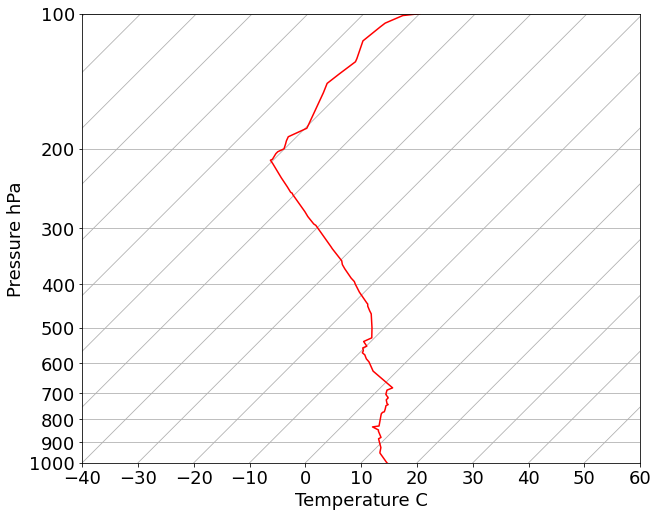

In [39]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = '18'

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')
# skew.plot(data['pressure'], data['dewpoint'], 'g')
# skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)
# ax.xlabel('Temperature C')
skew.ax.set_xlabel('Temperature C')
skew.ax.set_ylabel('Pressure hPa')

plt.show()

## with dry and we adiabatics

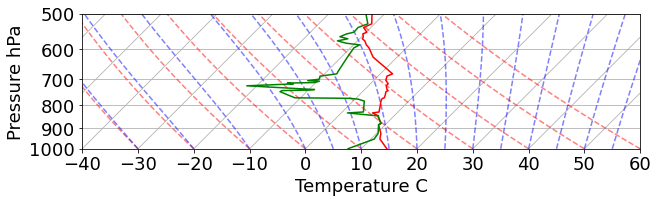

In [33]:
# with dry adiabatics

fig = plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = '18'

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')
skew.plot(data['pressure'], data['dewpoint'], 'g')

# skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 500)
skew.ax.set_xlim(-40, 60)
# ax.xlabel('Temperature C')
skew.ax.set_xlabel('Temperature C' )
skew.ax.set_ylabel('Pressure hPa')

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()

plt.show()

In [26]:
date = datetime(2021, 11, 1, 0)
station = 'OAK' # station list at https://www.ncei.noaa.gov/pub/data/igra/igra2-station-list.txt
data = WyomingUpperAir.request_data(site_id=station, time=date)

# GRB 2021 05 01 00
# GRB 2021 05 23 00 and 12

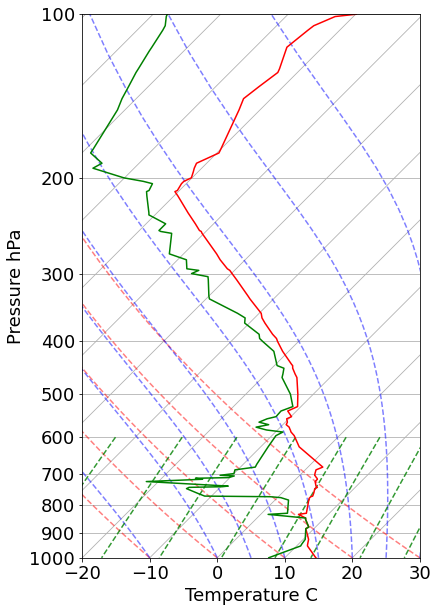

In [30]:
fig = plt.figure(figsize=(10, 10))
plt.rcParams['font.size'] = '18'

skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot.
skew.plot(data['pressure'], data['temperature'], 'r')
skew.plot(data['pressure'], data['dewpoint'], 'g')
# skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-20, 30)
# ax.xlabel('Temperature C')
skew.ax.set_xlabel('Temperature C')
skew.ax.set_ylabel('Pressure hPa')
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.show()